In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [6]:
#Data preprocessing
data = pd.read_csv('default of credit card clients.csv', header=1)

# Rename columns for better readability
data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# Separate features and target
X = data.iloc[:, 1:-1].values  # Features
y = data.iloc[:, -1].values    # Target (default payment next month)

# One-hot encode the target labels (0: no default, 1: default)
y = to_categorical(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')  # Output layer with 2 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
600/600 [==============================] - 2s 3ms/step - loss: 0.5064 - accuracy: 0.7948 - val_loss: 0.4630 - val_accuracy: 0.8069
Epoch 2/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4651 - accuracy: 0.8065 - val_loss: 0.4550 - val_accuracy: 0.8169
Epoch 3/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.8116 - val_loss: 0.4501 - val_accuracy: 0.8142
Epoch 4/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 0.8121 - val_loss: 0.4495 - val_accuracy: 0.8138
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4452 - accuracy: 0.8147 - val_loss: 0.4490 - val_accuracy: 0.8142
Epoch 6/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.8158 - val_loss: 0.4465 - val_accuracy: 0.8173
Epoch 7/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4412 - accuracy: 0.8165 - val_loss: 0.4436 - val_accuracy: 0.8165
Epoch 

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print(classification_report(y_test_labels, y_pred))

Test Accuracy: 0.82
188/188 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.68      0.31      0.42      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.63      0.66      6000
weighted avg       0.80      0.82      0.79      6000



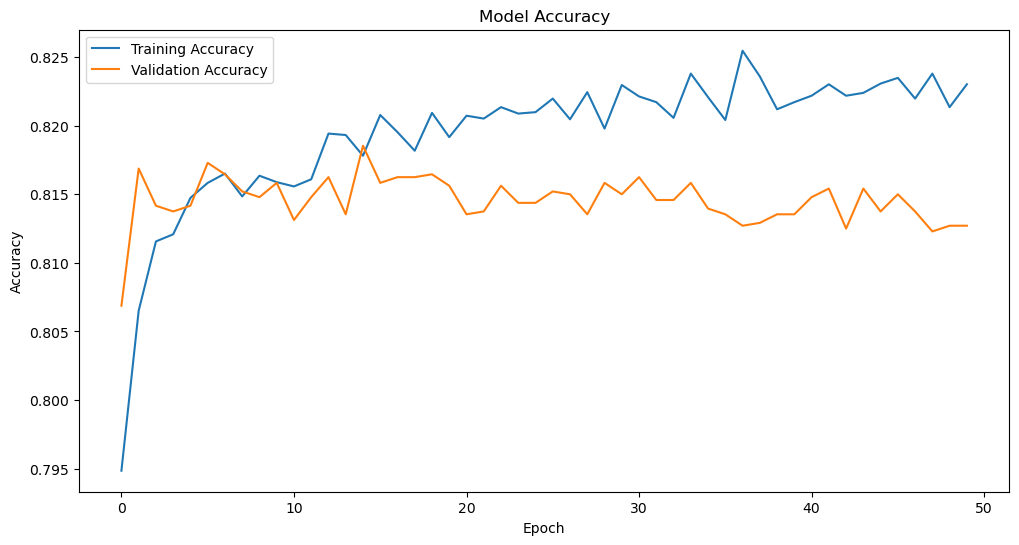

In [10]:
# Visualize training results (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()